# BENCHMARKING THE SOLVERS

## PREPARING THE DEVELOPMENT ENVIRONMENT

Including path to previous directory in built-in variable `sys.path`, allowing access to the `sudoku` package:

In [1]:
import sys

sys.path.append('../')

Importing the libraries:

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sudoku.utils import objective_grid
from sudoku.generators import generator
from sudoku.solvers import solver_ip, \
                           solver_backtracking, \
                           solver_backtracking_for_csp

pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


Implementing the benchmark function:

In [3]:
def solver_benchmark(func, args):
    '''
    Function to evaluate the efficiency of a given solver

    :param func:
    Solver function
    :param args:
    Sudoku instance set

    Returns the average resolution time
    '''
    times = []

    for arg in args:
        start_time = time.time()
        
        # Checks if the solver was successful
        if not objective_grid(func(arg)):
            return None

        times.append(time.time() - start_time)

    return np.mean(times)

Defining the constants and auxiliary variables:

In [4]:
N_SAMPLE = 20

cols = ['clues',
        'backtracking',
        'ip',
        'backtracking_for_csp']

clues = {col : []
         for col in cols}

## BENCHMARKS USING A SAMPLE WITH 41-CLUES GRIDS

In [5]:
sample_41 = [generator()
             for _ in range(N_SAMPLE)]

print(sample_41[0])

[[6 8 1 9 0 0 0 0 0]
 [0 0 3 8 0 4 0 0 1]
 [2 5 0 0 3 0 7 9 8]
 [0 0 7 0 4 0 8 0 9]
 [8 4 0 1 7 0 6 0 3]
 [0 0 2 0 0 0 0 0 4]
 [0 2 8 4 0 5 9 0 7]
 [0 0 6 0 0 3 0 8 5]
 [7 1 0 2 0 8 3 0 0]]


In [6]:
clues['clues'].append(41)

clues['backtracking'].append(solver_benchmark(solver_backtracking, sample_41))
clues['ip'].append(solver_benchmark(solver_ip, sample_41))
clues['backtracking_for_csp'].append(solver_benchmark(solver_backtracking_for_csp, sample_41))

## BENCHMARKS USING A SAMPLE WITH 38-CLUES GRIDS

In [7]:
sample_38 = [generator(38)
             for _ in range(N_SAMPLE)]

print(sample_38[0])

[[4 3 0 0 5 0 0 0 7]
 [0 1 0 3 0 8 0 0 0]
 [0 0 0 7 2 1 3 4 0]
 [6 0 0 8 0 0 0 1 0]
 [0 0 4 0 3 0 0 7 9]
 [0 8 0 2 0 0 6 3 5]
 [3 0 5 1 0 2 0 0 4]
 [9 4 1 0 0 0 0 0 0]
 [8 7 0 4 0 0 5 9 1]]


In [8]:
clues['clues'].append(38)

clues['backtracking'].append(solver_benchmark(solver_backtracking, sample_38))
clues['ip'].append(solver_benchmark(solver_ip, sample_38))
clues['backtracking_for_csp'].append(solver_benchmark(solver_backtracking_for_csp, sample_38))

## BENCHMARKS USING A SAMPLE WITH 35-CLUES GRIDS

In [9]:
sample_35 = [generator(35)
             for _ in range(N_SAMPLE)]

print(sample_35[0])

[[8 0 0 0 4 0 3 6 2]
 [0 0 0 6 0 3 8 0 5]
 [0 0 2 7 0 8 4 0 0]
 [0 7 6 0 0 5 9 0 0]
 [0 1 0 4 6 0 0 0 0]
 [0 0 4 0 0 0 0 0 0]
 [7 0 0 0 8 9 1 0 6]
 [4 0 8 0 0 0 0 5 3]
 [6 3 1 0 0 4 2 0 0]]


In [10]:
clues['clues'].append(35)

clues['backtracking'].append(solver_benchmark(solver_backtracking, sample_35))
clues['ip'].append(solver_benchmark(solver_ip, sample_35))
clues['backtracking_for_csp'].append(solver_benchmark(solver_backtracking_for_csp, sample_35))

## BENCHMARK FOR A SPECIFIC SUDOKU INSTANCE

The following instance was created by finnish mathematician Arto Inkala and is considered to be the hardest sudoku game in the world.

Obs.: On a difficulty scale ranging from 1 to 5 stars, the instance has 11 stars!

In [11]:
grid_inkala = np.array([[0, 0, 5, 3, 0, 0, 0, 0, 0],
                        [8, 0, 0, 0, 0, 0, 0, 2, 0],
                        [0, 7, 0, 0, 1, 0, 5, 0, 0],
                        [4, 0, 0, 0, 0, 5, 3, 0, 0],
                        [0, 1, 0, 0, 7, 0, 0, 0, 6],
                        [0, 0, 3, 2, 0, 0, 0, 8, 0],
                        [0, 6, 0, 5, 0, 0, 0, 0, 9],
                        [0, 0, 4, 0, 0, 0, 0, 3, 0],
                        [0, 0, 0, 0, 0, 9, 7, 0, 0]], dtype='int8')

print(grid_inkala)

[[0 0 5 3 0 0 0 0 0]
 [8 0 0 0 0 0 0 2 0]
 [0 7 0 0 1 0 5 0 0]
 [4 0 0 0 0 5 3 0 0]
 [0 1 0 0 7 0 0 0 6]
 [0 0 3 2 0 0 0 8 0]
 [0 6 0 5 0 0 0 0 9]
 [0 0 4 0 0 0 0 3 0]
 [0 0 0 0 0 9 7 0 0]]


In [12]:
clues['clues'].append(23)

clues['backtracking'].append(solver_benchmark(solver_backtracking, [grid_inkala]))
clues['ip'].append(solver_benchmark(solver_ip, [grid_inkala]))
clues['backtracking_for_csp'].append(solver_benchmark(solver_backtracking_for_csp, [grid_inkala]))

## SUMMARIZING THE DATA

In [13]:
data = pd.DataFrame(clues)
data

,clues,backtracking,ip,backtracking_for_csp
0,41,0.006176,0.010863,0.003153
1,38,0.014118,0.008706,0.003926
2,35,0.032945,0.009254,0.004084
3,23,3.970568,0.581538,0.014600


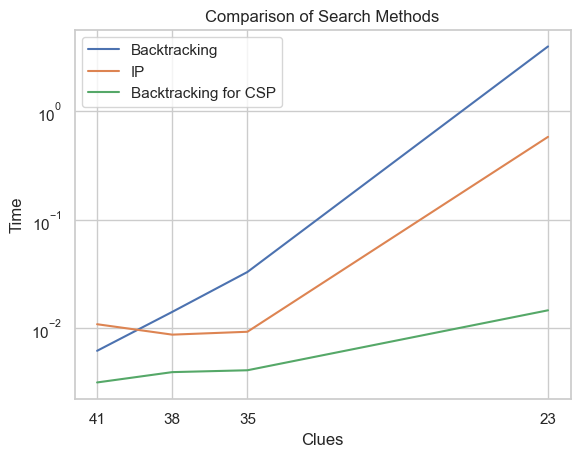

In [14]:
sns.set(style="whitegrid")

sns.lineplot(x='clues', y='backtracking', data=data, label='Backtracking')
sns.lineplot(x='clues', y='ip', data=data, label='IP')
sns.lineplot(x='clues', y='backtracking_for_csp', data=data, label='Backtracking for CSP')

plt.legend()
plt.xlabel('Clues')
plt.ylabel('Time')
plt.title('Comparison of Search Methods')

plt.yscale('log')
plt.xticks(data['clues'])
plt.gca().invert_xaxis()

plt.show()

By examining the data, we notice that the conventional search approach with backtracking proves highly efficient for simpler sudoku puzzles. However, it becomes impractical for tackling more intricate puzzles as the execution time significantly escalates.

While solving sudoku via integer linear programming presents a viable alternative, the search method tailored for constraint satisfaction problems emerges as the optimal choice. Under this strategy, the resolution time consistently stays below one tenths of a second even for the most challenging puzzle instances.